In [1]:
import pandas as pd
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split
from metadata.const import features, categorical_features, class_label

In [2]:
df = pd.read_csv('dataset/clean-sample-200k.csv')

/tmp/ipykernel_5918/553500891.py:1: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset/clean-sample-200k.csv')


In [3]:
numeric_features = [f for f in features.values() if f not in categorical_features and f in df.columns]
x = df[numeric_features]
y = df[class_label]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [4]:
clf = tree.DecisionTreeRegressor()
clf.fit(x_train, y_train)

DecisionTreeRegressor()

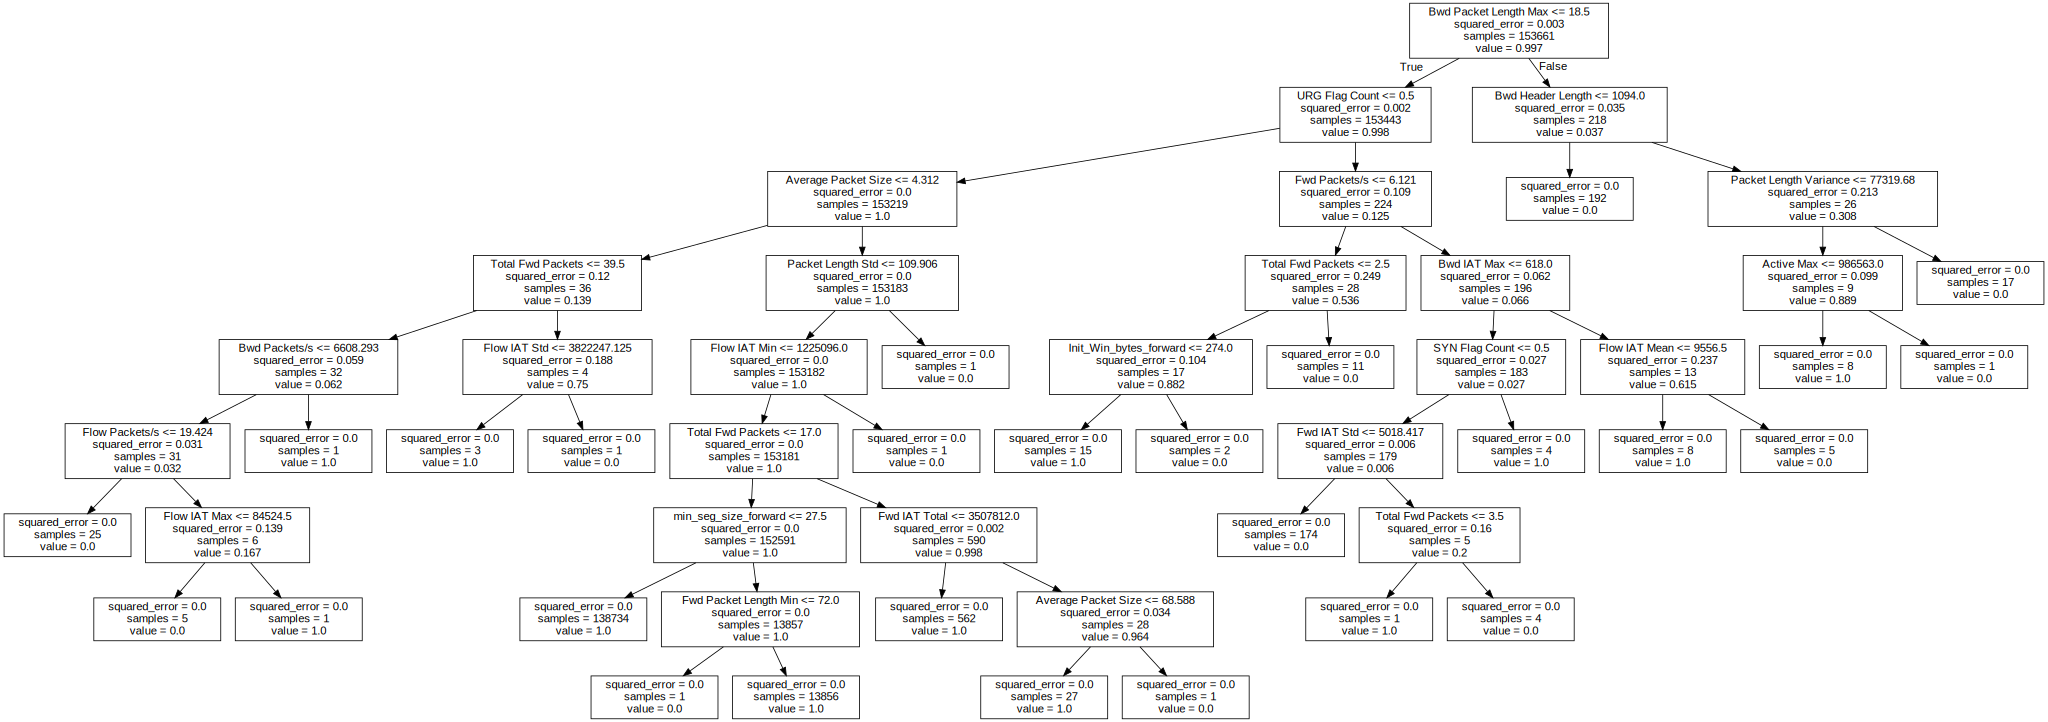

In [9]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=numeric_features, class_names=['benign', 'attack'])
graph = graphviz.Source(dot_data)
graph.render(filename='decision-tree')
graph

In [8]:
score = clf.score(x_test, y_test)
print(score)

0.9617014616172199
